(310, 2)
[[5.66570893 4.50219575]
 [4.93194582 3.15109909]
[[5.69685937 4.57506706]]
 [5.13770776 3.11053932]
[[5.81036743 4.753281  ]]
 [5.19174353 2.96032015]
[[5.94903738 5.02607781]]
 [5.16501278 2.70997508]
[[6.14385076 5.43893729]]
 [5.07236112 2.29566165]
[[6.42050344 6.04106429]]
 [4.90561511 1.69294057]
[[6.59727705 6.42839367]]
 [4.769727   1.30077258]


KeyboardInterrupt: 

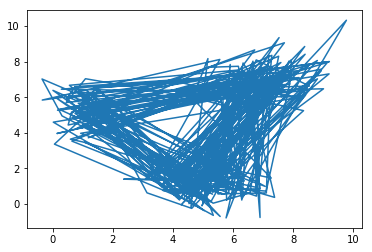

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.misc import factorial
import random
% matplotlib inline

class Clustering(object):
    def __init__(self):
        self.matr = 2
        self.matrix_assignation = None

    def initialize(self, data, cluster_number):
        self.centers = []
        self.shape = data.shape[1]
        for i in range(cluster_number):
            self.centers.append(np.random.uniform(data.min(0), data.max(0)))
        self.centers = np.array(self.centers)
        self.matrix_assignation = np.random.uniform(0, 1, (cluster_number, len(data)))
        self.A = self.matrix(data)

    def fit(self, data, cluster_number):
        data = np.array(data)
        self.initialize(data, cluster_number)
        for j in range(10):
            for k in range(len(data)):
                for i in range(cluster_number):
                    self.matrix_assignation[i, k] = self.assignation(data[k], i, data)
            self.A = self.matrix(data)
            for i in range(cluster_number):
                self.centers[i] = self.new_center(i, data)
            print(self.centers, end='\r')
        return self.assignation

    def assignation(self, k, i, data):
        counter = self.mahalanobis_distance(k, self.centers[i])
        factor = (counter / self.possibilistic_distribution(i, data)).item(0) ** (2 / (self.matr - 1))
        return 1 / (1 + factor)

    def new_center(self, i, data):
        counter = 0
        denominator = 0
        for k in range(len(data)):
            counter += (self.matrix_assignation[i, k] ** self.matr) * data[k]
            denominator += (self.matrix_assignation[i, k] ** self.matr)
        return counter / denominator

    def possibilistic_distribution(self, i, data):
        counter = 0
        denominator = 0
        for k in range(len(data)):
            counter += ((self.matrix_assignation[i, k]) ** (self.matr)) * (
                    self.mahalanobis_distance(data[k], self.centers[i]) ** 2)
            denominator += (self.matrix_assignation[i, k]) ** (self.matr)
        return counter / denominator

    def matrix(self, data):
        matrix = [0] * self.matrix_assignation.shape[1]
        for i in range(self.matrix_assignation.shape[1]):
            matrix[i] = np.cov(data, rowvar=False)
        return matrix

    def mahalanobis_distance(self, x, y):
        tmp = x - y
        A = np.linalg.inv(self.A)
        return (tmp @ A @ tmp).item(0) ** 0.5

    def fuzzy_assignation(self, k, i):
        u_ik = 0
        counter = self.mahalanobis_distance(k, i)
        for j in self.centers:
            denominator = self.mahalanobis_distance(k, j)
            factor = (counter / denominator) ** (2 / (self.matr - 1))
            u_ik += factor
        return (1 / u_ik)


def start():
    k = 2
    sizes = [130, 60, 120]
    clusters = []
    cmatrix = []
    matrix = [None] * len(sizes)
    matrix[0] = [7, 7] 
    matrix[1] = [1, 5] 
    matrix[2] = [5, 1] 
    
    for _ in range(len(sizes)):
        cmatrix.append(np.random.uniform(-1, 1, (k, k)))
        cmatrix[-1] = (cmatrix[-1] @ cmatrix[-1].T + np.identity(k)) / 2
    
    for i in range(len(sizes)):
        clusters.append(np.random.multivariate_normal(matrix[i], cmatrix[i], sizes[i]))
    
    x = np.concatenate(clusters)
    y = np.zeros([len(sizes), np.sum(sizes)])
    _y = []
    for i in range(len(sizes)):
        _y += [i] * sizes[i]
    y[np.array(_y), np.arange(np.sum(sizes))] = 1
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation]
    print(x.shape)
    plt.plot(x[:, 0], x[:, 1])
    cluster= Clustering()
    cluster.fit(x, 3)
    cluster.centers
    
start()
